In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier

from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Text(0, 0.5, 'Frequency')

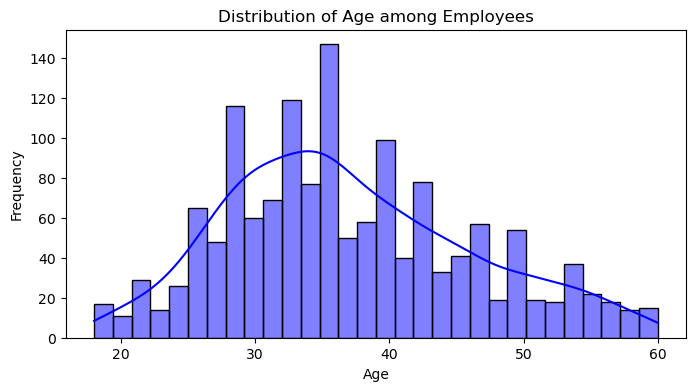

In [3]:
plt.figure(figsize=(8, 4), facecolor='white')
plt.title('Distribution of Age among Employees')
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

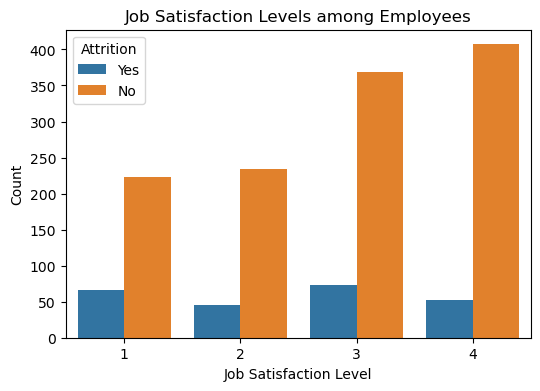

In [4]:
plt.figure(figsize=(6, 4), facecolor='white')
plt.title('Job Satisfaction Levels among Employees')
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

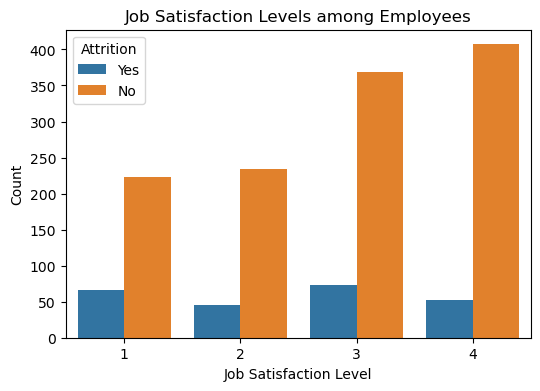

In [5]:
plt.figure(figsize=(6,4), facecolor='white')
plt.title('Job Satisfaction Levels among Employees')
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
le=LabelEncoder()
ob= ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in ob:
    df[i]=le.fit_transform(df[i].astype(str))   
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [10]:
def corr_columns(df, threshold):
    correlated_columns = set()
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns[:i]):
            if abs(df[col1].corr(df[col2])) > threshold:
                correlated_columns.add(col1)
    
    return correlated_columns

In [11]:
features = corr_columns(df, 0.5)
len(set(features))
print(features)

{'YearsWithCurrManager', 'JobLevel', 'YearsInCurrentRole', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncome', 'StockOptionLevel', 'JobRole', 'PerformanceRating', 'YearsSinceLastPromotion'}


In [12]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [17]:
best_f=SelectKBest(score_func=f_classif,k=17)
fit=best_f.fit(x,y)
df_scr=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(x.columns)

C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 7 20 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Abhishek\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [18]:
fea_scr=pd.concat([df_col,df_scr],axis=1)
fea_scr.columns=['Feature_name','Score']
print(fea_scr.nlargest(20,'Score'))

                Feature_name      Score
21                  OverTime  94.656457
27         TotalWorkingYears  44.252491
13                  JobLevel  43.215344
16             MaritalStatus  39.599763
31        YearsInCurrentRole  38.838303
17             MonthlyIncome  38.488819
0                        Age  38.175887
33      YearsWithCurrManager  36.712311
26          StockOptionLevel  28.140501
30            YearsAtCompany  27.001624
12            JobInvolvement  25.241985
15           JobSatisfaction  15.890004
9    EnvironmentSatisfaction  15.855209
4           DistanceFromHome   8.968277
14                   JobRole   6.649672
3                 Department   6.035877
29           WorkLifeBalance   6.026116
28     TrainingTimesLastYear   5.211646
2                  DailyRate   4.726640
24  RelationshipSatisfaction   3.095576


In [19]:
new=df[['OverTime','TotalWorkingYears','JobLevel','MaritalStatus','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','JobRole','Department','WorkLifeBalance']]

In [20]:
new.corr()

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,WorkLifeBalance
OverTime,1.000000,0.012754,0.000544,-0.017521,-0.029758,0.006089,0.028062,-0.041586,-0.000449,-0.011687,-0.003507,0.024539,0.070132,0.025514,0.040662,0.007481,-0.027092
TotalWorkingYears,0.012754,1.000000,0.782208,-0.077886,0.460365,0.772893,0.680381,0.459188,0.010136,0.628133,-0.005533,-0.020185,-0.002693,0.004628,-0.145439,-0.015762,0.001008
JobLevel,0.000544,0.782208,1.000000,-0.076769,0.389447,0.950300,0.509604,0.375281,0.013984,0.534739,-0.012630,-0.001944,0.001212,0.005303,-0.085457,0.101963,0.037818
MaritalStatus,-0.017521,-0.077886,-0.076769,1.000000,-0.065822,-0.075450,-0.095029,-0.038570,-0.662577,-0.059986,-0.038497,0.024360,-0.003593,-0.014437,0.067957,0.056073,0.014708
YearsInCurrentRole,-0.029758,0.460365,0.389447,-0.065822,1.000000,0.363818,0.212901,0.714365,0.050818,0.758754,0.008717,-0.002305,0.018007,0.018845,-0.028354,0.056315,0.049856
MonthlyIncome,0.006089,0.772893,0.950300,-0.075450,0.363818,1.000000,0.497855,0.344079,0.005408,0.514285,-0.015271,-0.007157,-0.006259,-0.017014,-0.093951,0.053130,0.030683
Age,0.028062,0.680381,0.509604,-0.095029,0.212901,0.497855,1.000000,0.202089,0.037510,0.311309,0.029820,-0.004892,0.010146,-0.001686,-0.122427,-0.031882,-0.021490
YearsWithCurrManager,-0.041586,0.459188,0.375281,-0.038570,0.714365,0.344079,0.202089,1.000000,0.024698,0.769212,0.025976,-0.027656,-0.004999,0.014406,-0.041150,0.034282,0.002759
StockOptionLevel,-0.000449,0.010136,0.013984,-0.662577,0.050818,0.005408,0.037510,0.024698,1.000000,0.015058,0.021523,0.010690,0.003432,0.044872,-0.019171,-0.012193,0.004129
YearsAtCompany,-0.011687,0.628133,0.534739,-0.059986,0.758754,0.514285,0.311309,0.769212,0.015058,1.000000,-0.021355,-0.003803,0.001458,0.009508,-0.083657,0.022920,0.012089


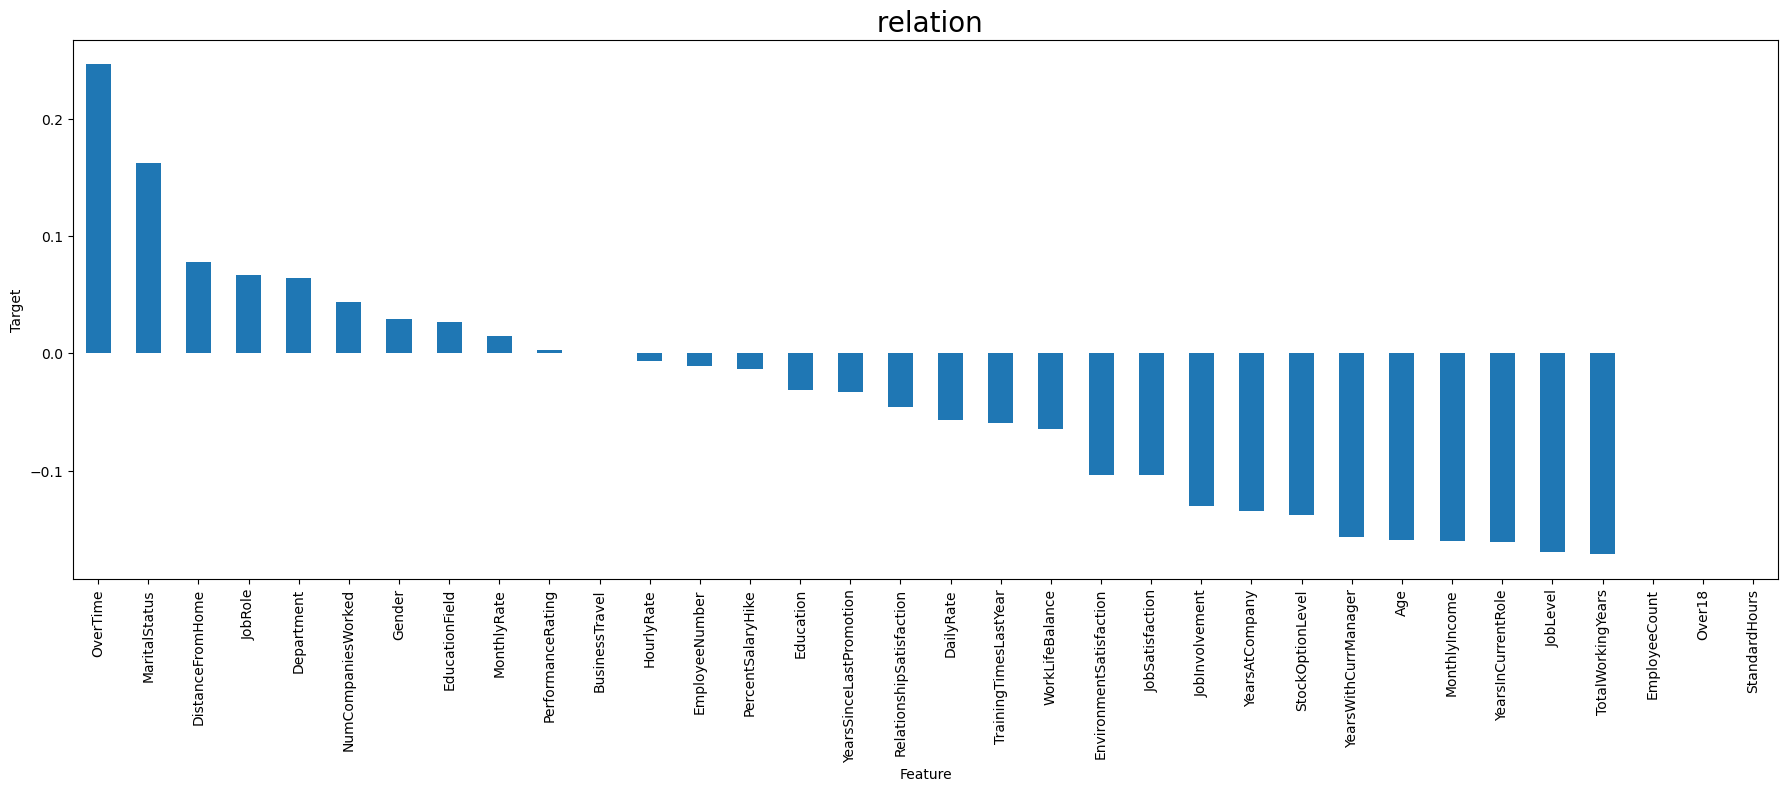

In [21]:
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

In [22]:
new.skew()

OverTime                   0.964489
TotalWorkingYears          1.117172
JobLevel                   1.025401
MaritalStatus             -0.152175
YearsInCurrentRole         0.917363
MonthlyIncome              1.369817
Age                        0.413286
YearsWithCurrManager       0.833451
StockOptionLevel           0.968980
YearsAtCompany             1.764529
JobInvolvement            -0.498419
JobSatisfaction           -0.329672
EnvironmentSatisfaction   -0.321654
DistanceFromHome           0.958118
JobRole                   -0.357270
Department                 0.172231
WorkLifeBalance           -0.552480
dtype: float64

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF val,Feature
0,2.054226,Age
1,1.016808,BusinessTravel
2,1.026401,DailyRate
3,1.942165,Department
4,1.018096,DistanceFromHome
5,1.065295,Education
6,1.016240,EducationField
7,0.000000,EmployeeCount
8,1.022699,EmployeeNumber
9,1.018022,EnvironmentSatisfaction


In [24]:
x.drop('MonthlyIncome',axis=1,inplace=True)

In [25]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [29]:
scaler=StandardScaler()
x_sca=scaler.fit_transform(new)

In [30]:
x_train,x_test,y_train, y_test = train_test_split(x_sca,y,test_size=0.25,random_state=48)

In [35]:
classifiers = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [36]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        result_type = "train"
    else:
        pred = clf.predict(x_test)
        result_type = "test"

    accuracy = accuracy_score(y_train if train else y_test, pred) * 100
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} result is: {accuracy:.2f}%')
for clf in classifiers:
    print(f'\n================== {clf.__class__.__name__} ==================')
    clf.fit(x_train, y_train)
    metric_score(clf, x_train, x_test, y_train, y_test, train=True)
    metric_score(clf, x_train, x_test, y_train, y_test, train=False)


================== LogisticRegression ==================

 ============ train result ==========
train result is: 86.30%

 ============ test result ==========
test result is: 87.50%

================== DecisionTreeClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 78.26%

================== RandomForestClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 88.86%

================== AdaBoostClassifier ==================

 ============ train result ==========
train result is: 87.48%

 ============ test result ==========
test result is: 89.67%

================== GradientBoostingClassifier ==================

 ============ train result ==========
train result is: 93.28%

 ============ test result ==========
test result is: 87.50%

================== SVC ==================

 ============ train result =

In [41]:
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)

    score = cross_val_score(clf, x_sca, y, cv=5) 

    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    y_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between Accuracy score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LogisticRegression ==================
Cross-Validation Scores: [0.86734694 0.86054422 0.86394558 0.84013605 0.86394558]
Mean Cross-Validation Score: 0.8591836734693878
Test Accuracy: 0.8750
Difference between Accuracy score and cross-validation ofLogisticRegression() score is 0.015816326530612157

================== DecisionTreeClassifier ==================
Cross-Validation Scores: [0.79591837 0.76530612 0.78571429 0.77210884 0.79931973]
Mean Cross-Validation Score: 0.783673469387755
Test Accuracy: 0.7989
Difference between Accuracy score and cross-validation ofDecisionTreeClassifier() score is 0.015239574090505914

================== RandomForestClassifier ==================
Cross-Validation Scores: [0.85714286 0.85714286 0.86054422 0.8537415  0.86054422]
Mean Cross-Validation Score: 0.8578231292517007
Test Accuracy: 0.8777
Difference between Accuracy score and cross-validation ofRandomForestClassifier() score is 0.019894262052647105

================== AdaBoostCla

In [42]:
good_grid = {'learning_rate': [0.01, 0.1, 0.2],'n_estimators': [50, 100, 200],'max_depth': [3, 4, 5],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]}

In [43]:
gbc = GradientBoostingClassifier()
gs = GridSearchCV(gbc, good_grid, cv=10, scoring='accuracy', n_jobs=-1)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [44]:
print(gs.best_params_)
gs.best_score_*100

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


86.66339066339066

In [45]:
final = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=4 ,min_samples_split=2,
    n_estimators= 100, subsample = 0.8)

final.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=4,
                           subsample=0.8)

In [46]:
pred1 = final.predict(x_test)
acc = accuracy_score(y_test, pred1)
print(acc*100)

86.41304347826086


In [48]:
import joblib
joblib.dump(final,'attriation.pkl')

['attriation.pkl']